In [1]:
from fastai.vision.all import *

In [2]:
DATASETS_DIR = Path(os.environ['DATASETS_DIR'])/'sorghum-id-fgvc-9'
DATASETS_DIR.ls()

(#4) [Path('/datasets/sorghum-id-fgvc-9/train_cultivar_mapping.csv'),Path('/datasets/sorghum-id-fgvc-9/test'),Path('/datasets/sorghum-id-fgvc-9/train_images'),Path('/datasets/sorghum-id-fgvc-9/sample_submission.csv')]

In [3]:
(DATASETS_DIR/'train_images').ls()

(#22194) [Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-03__12-58-24-135.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-15__12-32-43-241.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-01__11-31-50-488.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-02__16-25-06-191.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-28__12-52-56-384.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-05__12-08-56-198.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-13__11-37-46-365.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-26__18-27-33-812.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-27__11-00-20-408.png')...]

In [4]:
(DATASETS_DIR/'test').ls()

(#23639) [Path('/datasets/sorghum-id-fgvc-9/test/1320211956.png'),Path('/datasets/sorghum-id-fgvc-9/test/1460752465.png'),Path('/datasets/sorghum-id-fgvc-9/test/1437601570.png'),Path('/datasets/sorghum-id-fgvc-9/test/1053653999.png'),Path('/datasets/sorghum-id-fgvc-9/test/937061344.png'),Path('/datasets/sorghum-id-fgvc-9/test/1526324826.png'),Path('/datasets/sorghum-id-fgvc-9/test/1295561477.png'),Path('/datasets/sorghum-id-fgvc-9/test/993820791.png'),Path('/datasets/sorghum-id-fgvc-9/test/1054144892.png'),Path('/datasets/sorghum-id-fgvc-9/test/1911037980.png')...]

In [5]:
!head {DATASETS_DIR/'train_cultivar_mapping.csv'}

image,cultivar
2017-06-16__12-24-20-930.png,PI_257599
2017-06-02__16-48-57-866.png,PI_154987
2017-06-12__13-18-07-707.png,PI_92270
2017-06-22__13-18-06-841.png,PI_152651
2017-06-26__12-56-48-642.png,PI_176766
2017-06-05__12-30-08-470.png,PI_156330
2017-06-18__13-23-50-617.png,PI_329299
2017-06-15__14-08-45-158.png,PI_52606
2017-06-13__10-47-59-932.png,PI_145633


In [6]:
!head {DATASETS_DIR/'sample_submission.csv'}

filename,cultivar
1000005362.png,PI_152923
1000099707.png,PI_152923
1000135300.png,PI_152923
1000136796.png,PI_152923
1000292439.png,PI_152923
1000350798.png,PI_152923
100043618.png,PI_152923
1000556805.png,PI_152923
1000673645.png,PI_152923


In [7]:
files = get_image_files(DATASETS_DIR/"train_images")
len(files)

22193

In [8]:
files[0]

Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png')

In [9]:
df = pd.read_csv(DATASETS_DIR/'train_cultivar_mapping.csv')
df.head()

,image,cultivar
0,2017-06-16__12-24-20-930.png,PI_257599
1,2017-06-02__16-48-57-866.png,PI_154987
2,2017-06-12__13-18-07-707.png,PI_92270
3,2017-06-22__13-18-06-841.png,PI_152651
4,2017-06-26__12-56-48-642.png,PI_176766


In [10]:
MODEL = resnet34
BS = 8*17
RESIZE_TO = 32*20
ITEM_TFMS = RandomResizedCrop(RESIZE_TO, min_scale=0.3)
BATCH_TFMS = aug_transforms()
METRICS = error_rate

In [11]:
dls = ImageDataLoaders.from_df(df, 
                               DATASETS_DIR/'train_images',
                               bs = BS,
                               item_tfms=ITEM_TFMS,
                               batch_tfms=BATCH_TFMS)

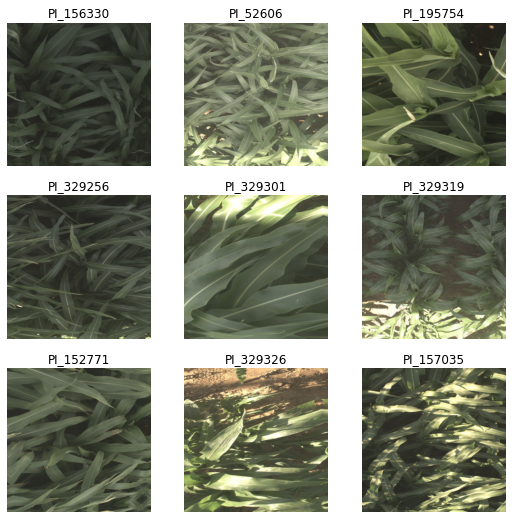

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, MODEL, metrics=METRICS).to_fp16()

In [ ]:
learn.lr_find()

In [ ]:
callbacks = [SaveModelCallback(monitor='error_rate', fname='resnet-34-frozen-10ep')]

In [ ]:
learn.fit_one_cycle(10, 
                    lr_max=slice(3e-4, 3e-3),
                    cbs=callbacks
                   )

In [ ]:
learn.recorder.plot_loss()

In [ ]:
# learn.freeze_to(-3)

In [ ]:
# learn.lr_find()

In [16]:
callbacks = [SaveModelCallback(monitor='error_rate', fname='resnet-34-unfrozen-0-30ep')]

In [17]:
learn.unfreeze()

SuggestedLRs(valley=1.4454397387453355e-05)

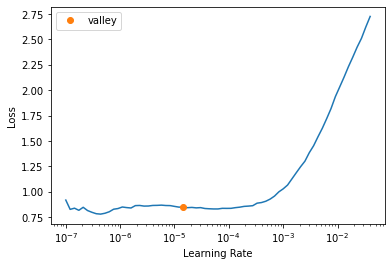

In [18]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(30, 
                    lr_max=slice(2e-6, 1e-5),
                    cbs=callbacks,
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.847039,0.440103,0.129112,03:10
1,0.861732,0.444535,0.133168,03:12
2,0.856567,0.443107,0.130239,03:09
3,0.822528,0.428312,0.124831,03:08
4,0.800727,0.426721,0.127084,03:09
5,0.769313,0.410209,0.120775,03:13
6,0.745197,0.396238,0.117621,03:08
7,0.723737,0.386635,0.114917,03:13
8,0.691989,0.381730,0.110635,03:14
9,0.681948,0.367782,0.105678,03:13


Better model found at epoch 0 with error_rate value: 0.12911221385002136.
Better model found at epoch 3 with error_rate value: 0.12483100593090057.
Better model found at epoch 5 with error_rate value: 0.12077512592077255.
Better model found at epoch 6 with error_rate value: 0.117620550096035.
Better model found at epoch 7 with error_rate value: 0.11491663008928299.
Better model found at epoch 8 with error_rate value: 0.1106354221701622.
Better model found at epoch 9 with error_rate value: 0.10567823052406311.
Better model found at epoch 13 with error_rate value: 0.10387562215328217.
Better model found at epoch 15 with error_rate value: 0.10274898260831833.
Better model found at epoch 16 with error_rate value: 0.0980171263217926.
Better model found at epoch 17 with error_rate value: 0.0959891825914383.
Better model found at epoch 22 with error_rate value: 0.09486255049705505.
Better model found at epoch 24 with error_rate value: 0.09080667048692703.


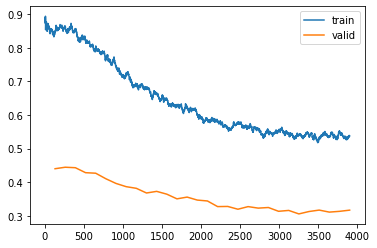

In [20]:
learn.recorder.plot_loss()

SuggestedLRs(valley=3.630780702224001e-05)

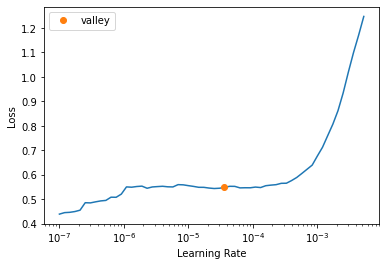

In [21]:
learn.lr_find()

In [22]:
callbacks = [SaveModelCallback(monitor='error_rate', fname='resnet-34-unfrozen-1-30ep')]

In [23]:
learn.fit_one_cycle(30, 
                    lr_max=slice(2e-5, 1e-4),
                    cbs=callbacks,
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.547431,0.318417,0.094412,03:06
1,0.531636,0.316750,0.094863,03:05
2,0.536876,0.328743,0.098918,03:07
3,0.509975,0.367009,0.109734,03:05
4,0.496663,0.377319,0.119423,03:06
5,0.489708,0.286393,0.087427,03:06
6,0.440883,0.393957,0.123028,03:06
7,0.398157,0.327038,0.106129,03:06
8,0.375141,0.325953,0.103650,03:07
9,0.338796,0.232346,0.071429,03:06


Better model found at epoch 0 with error_rate value: 0.09441189467906952.
Better model found at epoch 5 with error_rate value: 0.08742676675319672.
Better model found at epoch 9 with error_rate value: 0.0714285746216774.
Better model found at epoch 10 with error_rate value: 0.07120324671268463.
Better model found at epoch 11 with error_rate value: 0.06399279087781906.
Better model found at epoch 13 with error_rate value: 0.06196485087275505.
Better model found at epoch 15 with error_rate value: 0.05858493968844414.
Better model found at epoch 17 with error_rate value: 0.05723298341035843.
Better model found at epoch 18 with error_rate value: 0.05430373176932335.
Better model found at epoch 19 with error_rate value: 0.04979719966650009.
Better model found at epoch 20 with error_rate value: 0.04529066011309624.
Better model found at epoch 22 with error_rate value: 0.04168543592095375.
Better model found at epoch 24 with error_rate value: 0.040108151733875275.
Better model found at epoch 

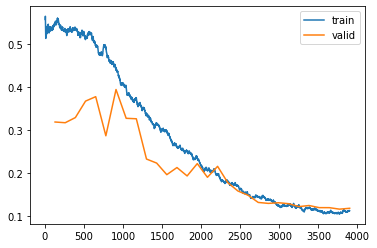

In [24]:
learn.recorder.plot_loss()

SuggestedLRs(valley=8.31763736641733e-06)

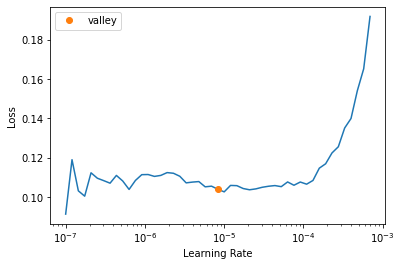

In [25]:
learn.lr_find()

In [26]:
callbacks = [SaveModelCallback(monitor='error_rate', fname='resnet-34-unfrozen-2-40ep')]

In [27]:
learn.fit_one_cycle(40, 
                    lr_max=slice(5e-6, 1e-5),
                    cbs=callbacks,
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.105449,0.112178,0.038756,03:08
1,0.108216,0.115563,0.038531,03:06
2,0.109573,0.116172,0.039657,03:06
3,0.109740,0.117365,0.039883,03:06
4,0.102076,0.120795,0.038982,03:07
5,0.101827,0.124531,0.040784,03:07
6,0.107697,0.114694,0.037855,03:06
7,0.100682,0.118230,0.039657,03:07
8,0.107955,0.118047,0.041685,03:08
9,0.102919,0.111534,0.036052,03:06


Better model found at epoch 0 with error_rate value: 0.03875618800520897.
Better model found at epoch 1 with error_rate value: 0.0385308712720871.
Better model found at epoch 6 with error_rate value: 0.0378548838198185.
Better model found at epoch 9 with error_rate value: 0.03605227172374725.
Better model found at epoch 16 with error_rate value: 0.03537629172205925.
Better model found at epoch 17 with error_rate value: 0.03402433171868324.
Better model found at epoch 25 with error_rate value: 0.03244704380631447.
Better model found at epoch 33 with error_rate value: 0.03109508752822876.


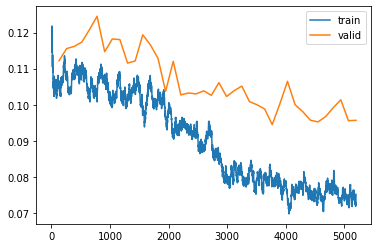

In [28]:
learn.recorder.plot_loss()

In [29]:
test_files = get_image_files(DATASETS_DIR/"test")
len(test_files)

23639

In [30]:
test_files

(#23639) [Path('/datasets/sorghum-id-fgvc-9/test/1320211956.png'),Path('/datasets/sorghum-id-fgvc-9/test/1460752465.png'),Path('/datasets/sorghum-id-fgvc-9/test/1437601570.png'),Path('/datasets/sorghum-id-fgvc-9/test/1053653999.png'),Path('/datasets/sorghum-id-fgvc-9/test/937061344.png'),Path('/datasets/sorghum-id-fgvc-9/test/1526324826.png'),Path('/datasets/sorghum-id-fgvc-9/test/1295561477.png'),Path('/datasets/sorghum-id-fgvc-9/test/993820791.png'),Path('/datasets/sorghum-id-fgvc-9/test/1054144892.png'),Path('/datasets/sorghum-id-fgvc-9/test/1911037980.png')...]

In [31]:
test_dl = learn.dls.test_dl(test_files)

In [32]:
tta_preds, _ = learn.tta(dl=test_dl, n=8)

In [33]:
decoded = tta_preds.argmax(dim=1)

In [34]:
learn.dls.vocab[decoded]

(#23639) ['PI_180348','PI_22913','PI_302252','PI_152733','PI_63715','PI_144134','PI_145619','PI_152961','PI_175919','PI_154987'...]

In [35]:
fieldnames = ['filename', 'cultivar']
predictions = [{'filename': f.name, 'cultivar': c} 
               for f,c in zip(test_files, learn.dls.vocab[decoded])]

In [36]:
import csv
  
with open('predictions.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
    writer.writeheader()
    writer.writerows(predictions)